In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("cleaned_data.csv")
df

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,numVotes
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,90 min,"Children & Family Movies, Comedies",3.400000,578.0
1,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,99 min,Comedies,5.100000,7143.0
2,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",6.000000,60800.0
3,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,90 min,"Action & Adventure, Thrillers",5.500000,17701.0
4,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,95 min,"Action & Adventure, Dramas, International Movies",6.100000,22174.0
...,...,...,...,...,...,...,...,...,...,...,...
7183,TV Show,Kikoriki,Kunle Afolayan,Igor Dmitriev,United States,"January 1, 2020",2010,2 Seasons,Kids' TV,4.800000,15.0
7184,TV Show,Red vs. Blue,Kunle Afolayan,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"January 1, 2020",2015,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",6.262838,1545.0
7185,TV Show,Maron,Kunle Afolayan,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"January 1, 2020",2016,4 Seasons,TV Comedies,5.200000,372.0
7186,Movie,Little Baby Bum: Nursery Rhyme Friends,Kunle Afolayan,David Attenborough,United States,"January 1, 2020",2016,60 min,Movies,6.262838,1545.0


In [2]:
##Univariate Analysis

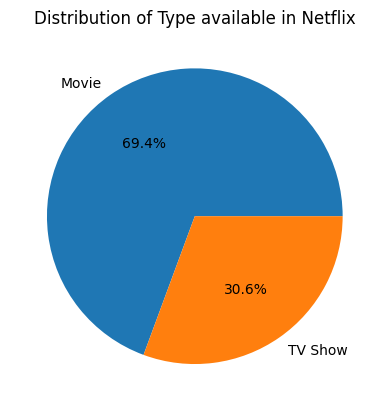

In [9]:
percentages=df["type"].value_counts(normalize=True)*100

plt.pie(percentages,labels=percentages.index,autopct='%1.1f%%')
plt.title("Distribution of Type available in Netflix")
plt.show()

In [10]:
## This shows that maximum type of content available on Netflix is movie type

Text(0, 0.5, 'count of content released')

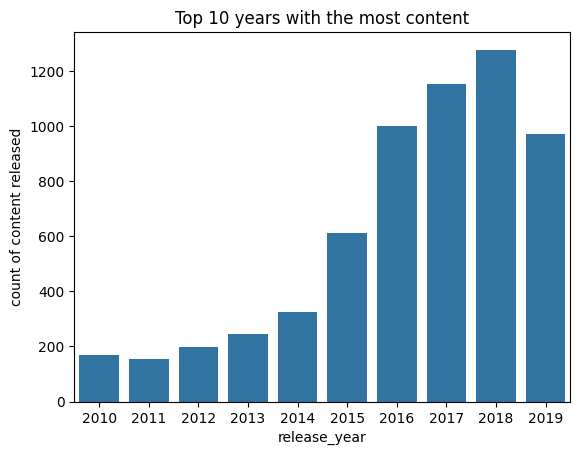

In [17]:
yearly_counts=df["release_year"].value_counts().nlargest(10).sort_index()

sns.barplot(x=yearly_counts.index,y=yearly_counts.values)
plt.title("Top 10 years with the most content")
plt.xlabel("release_year")
plt.ylabel("count of content released")

In [18]:
## This shows the year 2018 released the most content on netflix

<Axes: xlabel='type'>

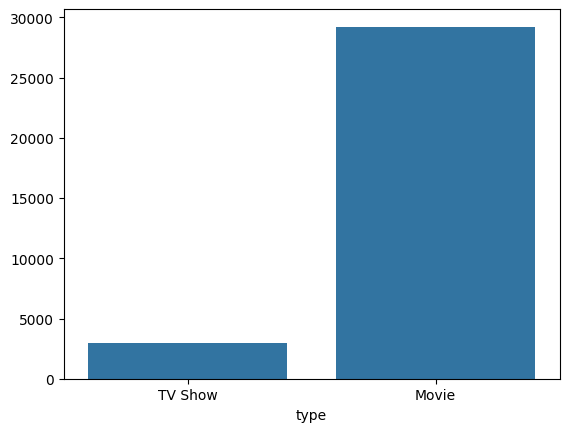

In [24]:
avg_votes=df.groupby("type")["numVotes"].mean().sort_values(ascending=True)

sns.barplot(x=avg_votes.index,y=avg_votes.values)

In [25]:
## On an average many customers voted more for movie than tv shows

In [26]:
df["country"]=df["country"].str.split(',')
df["country"]=df["country"].explode("country").str.strip()

Text(0, 0.5, 'number of titles')

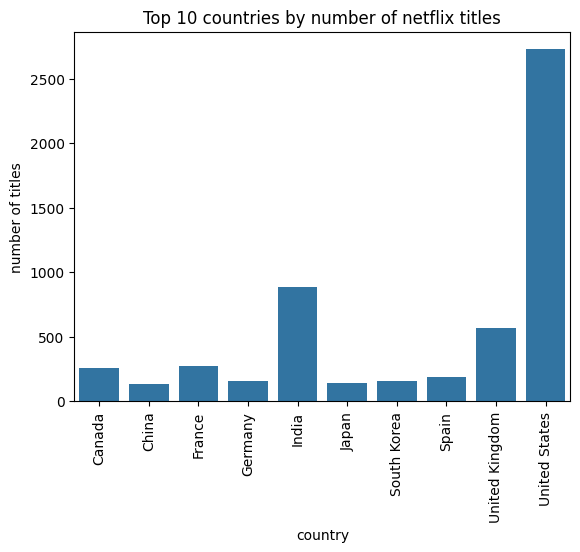

In [28]:
country_counts=df["country"].value_counts().nlargest(10).sort_index()

sns.barplot(x=country_counts.index,y=country_counts.values)
plt.title("Top 10 countries by number of netflix titles")
plt.xticks(rotation=90)
plt.xlabel("country")
plt.ylabel("number of titles")

In [29]:
## United States produced the most netflix content

<Axes: xlabel='averageRating', ylabel='numVotes'>

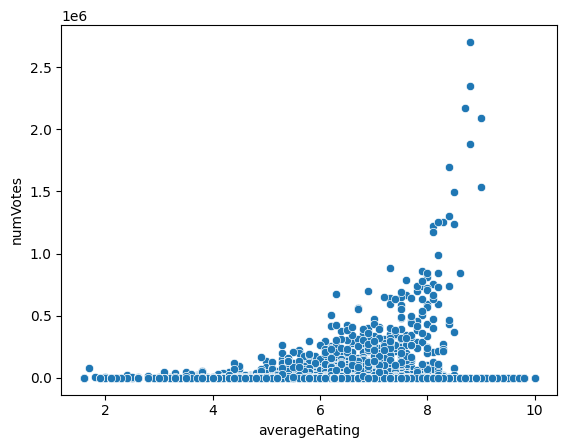

In [36]:
sns.scatterplot(x=df['averageRating'],y=df['numVotes'],data=df)

In [37]:
## No correlation between averageRating and numVotes

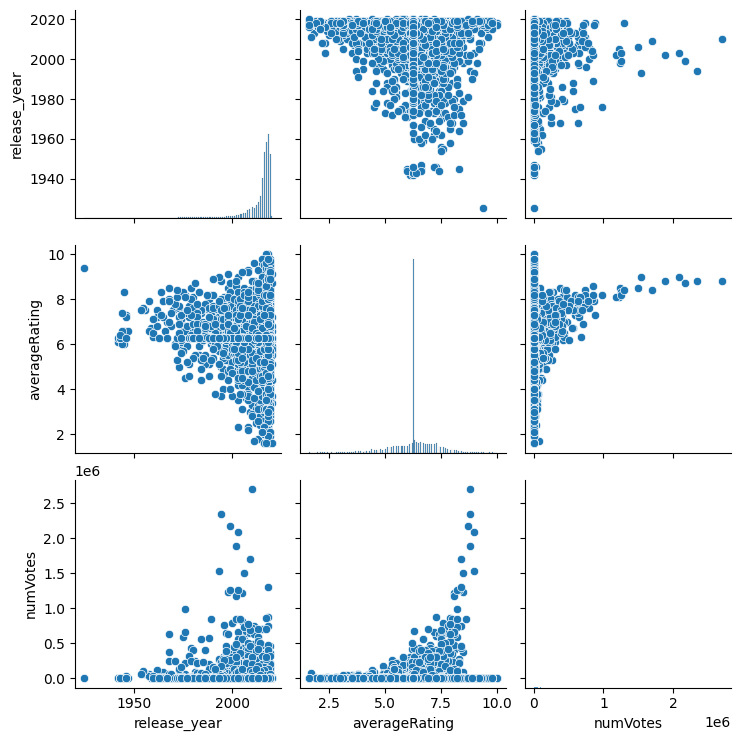

In [30]:
sns.pairplot(df)

<Axes: >

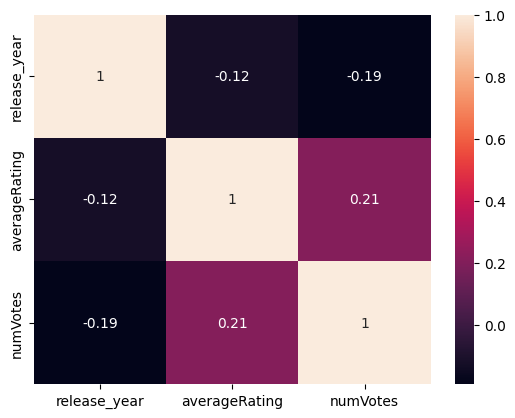

In [34]:
numeric_features=[i for i in df.columns if df[i].dtype!='O']
numeric_df=df[numeric_features]
sns.heatmap(numeric_df.corr(),annot=True)

In [35]:
## averageRating and numVotes and not correlated and release_year and averageRating are negatively correlated